In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier, ExtraTreesClassifier, GradientBoostingClassifier, RandomForestClassifier
from sklearn.svm import SVC
from vecstack import stacking
from sklearn.neural_network import MLPClassifier

In [2]:
df = pd.read_csv('credit_card_default_train_remake.csv')
df = df.drop('AGE',axis=1) #Removing Age
df.head(30)

,Balance_Limit_V1,Gender,EDUCATION_STATUS,MARITAL_STATUS,PAY_JULY,PAY_AUG,PAY_SEP,PAY_OCT,PAY_NOV,PAY_DEC,...,DUE_AMT_NOV,DUE_AMT_DEC,PAID_AMT_JULY,PAID_AMT_AUG,PAID_AMT_SEP,PAID_AMT_OCT,PAID_AMT_NOV,PAID_AMT_DEC,NEXT_MONTH_DEFAULT,AgeBin
0,1000000.0,M,Graduate,Other,-1,-1,-1,-1,-1,-1,...,162772,-13982,3437,6004,39418,162772,0,538165,0,2
1,1000000.0,F,High School,Other,0,-1,-1,-1,-1,0,...,80811,124590,151818,46200,43530,80811,942,33666,0,1
2,100000.0,F,High School,Single,4,3,2,2,-2,-2,...,0,0,0,0,0,0,0,0,1,2
3,200000.0,F,Graduate,Single,2,0,0,0,0,0,...,100353,102740,3855,3890,3696,4620,4049,3918,1,2
4,1000000.0,F,Graduate,Other,2,2,0,0,0,0,...,445271,453899,0,20790,16170,17325,16401,17325,0,2
5,400000.0,F,Graduate,Single,0,0,0,0,0,0,...,356117,358845,16632,18480,12728,13398,13860,12705,0,2
6,100000.0,M,Other,Single,1,2,2,2,2,2,...,12030,12647,0,3696,0,1386,1155,0,0,1
7,100000.0,F,High School,Other,2,2,2,0,0,2,...,59272,57976,5521,0,1984,4844,0,2523,1,1
8,500000.0,M,Other,Other,0,0,0,2,0,0,...,213654,217992,9240,17325,0,6930,11550,11550,0,2
9,1000000.0,M,Other,Single,0,0,2,0,0,0,...,222936,224276,26565,0,8184,8547,8194,7311,0,3


In [4]:
df['SexMar'] = 0

df.loc[((df.Gender == 'M') & (df.MARITAL_STATUS == 'Single')) , 'SexMar'] = 1
df.loc[((df.Gender == 'M') & (df.MARITAL_STATUS == 'Other')) , 'SexMar'] = 2
df.loc[((df.Gender == 'F') & (df.MARITAL_STATUS == 'Single')) , 'SexMar'] = 3
df.loc[((df.Gender == 'F') & (df.MARITAL_STATUS == 'Other')) , 'SexMar'] = 4

df['SexAge'] = 0

df.loc[((df.Gender == 'M') & (df.AgeBin == 1)) , 'SexAge'] = 1
df.loc[((df.Gender == 'M') & (df.AgeBin == 2)) , 'SexAge'] = 2
df.loc[((df.Gender == 'M') & (df.AgeBin == 3)) , 'SexAge'] = 3
df.loc[((df.Gender == 'M') & (df.AgeBin == 4)) , 'SexAge'] = 4
df.loc[((df.Gender == 'F') & (df.AgeBin == 1)) , 'SexAge'] = 5
df.loc[((df.Gender == 'F') & (df.AgeBin == 2)) , 'SexAge'] = 6
df.loc[((df.Gender == 'F') & (df.AgeBin == 3)) , 'SexAge'] = 7
df.loc[((df.Gender == 'F') & (df.AgeBin == 4)) , 'SexAge'] = 8



fil = (df.PAY_JULY == -1) | (df.PAY_JULY == 0)
df.loc[fil, 'PAY_JULY'] = -1
fil = (df.PAY_AUG == -1) | (df.PAY_AUG == 0)
df.loc[fil, 'PAY_AUG'] = -1
fil = (df.PAY_SEP == -1) | (df.PAY_SEP == 0)
df.loc[fil, 'PAY_SEP'] = -1
fil = (df.PAY_OCT == -1) | (df.PAY_OCT == 0)
df.loc[fil, 'PAY_OCT'] = -1
fil = (df.PAY_NOV == -1) | (df.PAY_NOV == 0)
df.loc[fil, 'PAY_NOV'] = -1
fil = (df.PAY_DEC == -1) | (df.PAY_DEC == 0)
df.loc[fil, 'PAY_DEC'] = -1



df['Avg_exp_5'] = ((df['DUE_AMT_NOV'] - (df['DUE_AMT_DEC'] - df['PAID_AMT_NOV']))) / df['Balance_Limit_V1']

df['Avg_exp_4'] = (((df['DUE_AMT_NOV'] - (df['DUE_AMT_DEC'] - df['PAID_AMT_NOV'])) +
                 (df['DUE_AMT_OCT'] - (df['DUE_AMT_NOV'] - df['PAID_AMT_OCT']))) / 2) / df['Balance_Limit_V1']

df['Avg_exp_3'] = (((df['DUE_AMT_NOV'] - (df['DUE_AMT_DEC'] - df['PAID_AMT_NOV'])) +
                 (df['DUE_AMT_OCT'] - (df['DUE_AMT_NOV'] - df['PAID_AMT_OCT'])) +
                 (df['DUE_AMT_SEP'] - (df['DUE_AMT_OCT'] - df['PAID_AMT_SEP']))) / 3) / df['Balance_Limit_V1']

df['Avg_exp_2'] = (((df['DUE_AMT_NOV'] - (df['DUE_AMT_DEC'] - df['PAID_AMT_NOV'])) +
                 (df['DUE_AMT_OCT'] - (df['DUE_AMT_NOV'] - df['PAID_AMT_OCT'])) +
                 (df['DUE_AMT_SEP'] - (df['DUE_AMT_OCT'] - df['PAID_AMT_SEP'])) +
                 (df['DUE_AMT_AUG'] - (df['DUE_AMT_SEP'] - df['PAID_AMT_AUG']))) / 4) / df['Balance_Limit_V1']

df['Avg_exp_1'] = (((df['DUE_AMT_NOV'] - (df['DUE_AMT_DEC'] - df['PAID_AMT_NOV'])) +
                 (df['DUE_AMT_OCT'] - (df['DUE_AMT_NOV'] - df['PAID_AMT_OCT'])) +
                 (df['DUE_AMT_SEP'] - (df['DUE_AMT_OCT'] - df['PAID_AMT_SEP'])) +
                 (df['DUE_AMT_AUG'] - (df['DUE_AMT_SEP'] - df['PAID_AMT_AUG'])) +
                 (df['DUE_AMT_JULY'] - (df['DUE_AMT_AUG'] - df['PAID_AMT_JULY']))) / 5) / df['Balance_Limit_V1']

df['Closeness_6'] = (df.Balance_Limit_V1 - df.DUE_AMT_DEC) / df.Balance_Limit_V1
df['Closeness_5'] = (df.Balance_Limit_V1 - df.DUE_AMT_NOV) / df.Balance_Limit_V1
df['Closeness_4'] = (df.Balance_Limit_V1 - df.DUE_AMT_OCT) / df.Balance_Limit_V1
df['Closeness_3'] = (df.Balance_Limit_V1 - df.DUE_AMT_SEP) / df.Balance_Limit_V1
df['Closeness_2'] = (df.Balance_Limit_V1 - df.DUE_AMT_AUG) / df.Balance_Limit_V1
df['Closeness_1'] = (df.Balance_Limit_V1 - df.DUE_AMT_JULY) / df.Balance_Limit_V1


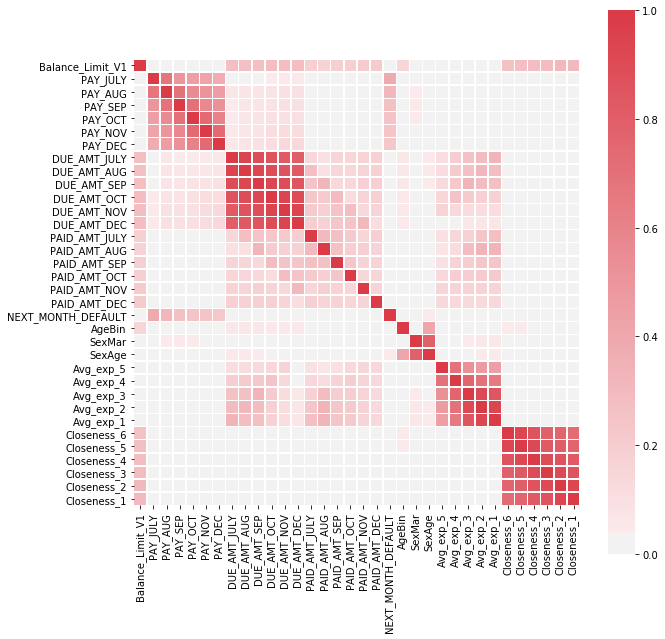

In [14]:
#////////////////////////// Plotting Graphs ////////////////////////////////////
corr = df.corr()
f, ax = plt.subplots(figsize=(10, 10))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, cmap=cmap, vmin=0,vmax=1, center=0,square=True, linewidths=.5)
#///////////////////////////////////////////////////////////////////////////////

In [5]:
Y = df['NEXT_MONTH_DEFAULT']
X = df.drop(['NEXT_MONTH_DEFAULT','Gender'],axis=1)

In [6]:
label_enc = LabelEncoder()

X['EDUCATION_STATUS'] = label_enc.fit_transform(X['EDUCATION_STATUS'])
X['MARITAL_STATUS'] = label_enc.fit_transform(X['MARITAL_STATUS'])

In [9]:
#///////////////////////// Train-Test Split ////////////////////////////////////

X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.4,random_state=0)

#////////////////////////////////////////////////////////////////////////////////

In [13]:
###############################################################################
#                        4. Defining Model to be stacked                      #
###############################################################################


models = [ 
        
    RandomForestClassifier(n_estimators = 70,criterion = "entropy",random_state=0),
        
    XGBClassifier(random_state=0,learning_rate=0.1,n_estimators=60, max_depth=5),
    
    GradientBoostingClassifier(n_estimators=60, learning_rate=0.1, max_features=2, max_depth=2, random_state=0),
    
    BaggingClassifier(),
 
    AdaBoostClassifier()
]

###############################################################################
#                5. Stacking Each models and get final dataset                #
###############################################################################

S_train, S_test = stacking(models,                   
                           X_train, y_train, X_test,   
                           regression=False, 
     
                           mode='oof_pred_bag', 
       
                           needs_proba=False,
            
                           metric=accuracy_score, 
    
                           n_folds=15, 
                 
                           stratified=True,
            
                           shuffle=True,  
            
                           random_state=0,    
         
                           verbose=2)


task:         [classification]
n_classes:    [2]
metric:       [accuracy_score]
mode:         [oof_pred_bag]
n_models:     [5]

model  0:     [RandomForestClassifier]
    fold  0:  [0.80332986]
    fold  1:  [0.80000000]
    fold  2:  [0.81562500]
    fold  3:  [0.81562500]
    fold  4:  [0.80729167]
    fold  5:  [0.80520833]
    fold  6:  [0.80104167]
    fold  7:  [0.81354167]
    fold  8:  [0.79895833]
    fold  9:  [0.79583333]
    fold 10:  [0.81458333]
    fold 11:  [0.81354167]
    fold 12:  [0.80833333]
    fold 13:  [0.80312500]
    fold 14:  [0.82168926]
    ----
    MEAN:     [0.80784850] + [0.00732245]
    FULL:     [0.80784722]

model  1:     [XGBClassifier]
    fold  0:  [0.81061394]
    fold  1:  [0.81041667]
    fold  2:  [0.81979167]
    fold  3:  [0.81666667]
    fold  4:  [0.81250000]
    fold  5:  [0.81562500]
    fold  6:  [0.80833333]
    fold  7:  [0.81250000]
    fold  8:  [0.81041667]
    fold  9:  [0.80520833]
    fold 10:  [0.81979167]
    fold 11:  [0.81354

In [17]:
###############################################################################
#                5. Training final meta classifier for stacked dataset        #
###############################################################################

model = GradientBoostingClassifier(n_estimators=60, learning_rate=0.1, max_features=2, max_depth=2, random_state=0)
model = model.fit(S_train, y_train)
y_pred = model.predict(S_test)

#print('Final prediction score: [%f]' % confusion_matrix(y_test,y_pred).ravel())
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    
diff = (((tp+tn)/(tp+tn+fn+fp)))
print(diff)

0.8255208333333334


In [ ]:
#Accuracy : 0.8255208333333334